# Stefan-Maxwell diffusion involving three components


This example demonstrates the modeling of the multicomponent Stefan-Maxwell model involving three componentt.
First we import the Stefan-Maxwell diffusion module

In [1]:
import numpy as np
from diffusionpy import Diffusion_MS,D_Matrix,Diffusion_MS_iter,vpure
import matplotlib.pyplot as plt

We want to describe the diffusion of water into an ASD film. The ASD-water mixture is a ternary system. First we define starting and equilibrium weight fractions.

In [2]:
nc=3
L=0.001
wi0=np.asarray([0.01,0.495,0.495])
wi8=np.asarray([0.9,0.05,0.05])
Mi=np.asarray([18.015,357.57,65000])
T=298.15
p=1E5

kij=D_Matrix(np.asarray([-0.156,-0.025,-0.0621]),nc)
par={"mi":np.asarray([1.20469,2420.99, 14.283]),
"si": np.asarray([2.797059952,2.947, 3.535]),
"ui" :np.asarray([353.95,205.27, 262.79]),
"eAi" :np.asarray([2425.67,0., 886.4]),
"kAi":np.asarray([0.04509,0.02, 0.02]),
"NAi":np.asarray([1.,653., 3.]),
"Mi": Mi,
"kij":kij}

vpures=vpure(p,T,**par)
par["vpure"]=vpures


For a the diffusion of three components, three binary diffusion coefficients need to be defined


$\hat{Ð} =$ 
$\left[\begin{array}{rrr} 
0 & Ð_{12} & Ð_{13} \\ 
0 & 0 & Ð_{23} \\ 
0 & 0 & 0 \\ 
\end{array}\right]$

$Ð_{vec} = \left[\begin{array}{rrr} Ð_{12} & Ð_{13} & Ð_{23} \end{array}\right]$

In [3]:
Dvec=np.asarray([1E-13,2.3E-11,1.7E-13])

Next we define the time array and which component is mobile

In [5]:
nt=300
t=np.linspace(0,300,nt)*60
volatile=np.asarray([True,True,True])

In [6]:
wtid=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,volatile)
wt=Diffusion_MS_iter(t,L,Dvec,wi0,wi8,Mi,volatile,T=T,par=par)

------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0376045 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1188123 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1353578 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.147826 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1742384 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.2198395 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.3191227 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.23

We can determine the mass dissolved in the dissolution medium by quantifying the mass that leaves the ASD. The initial mass of the ASD and the mass of the dissolution medium must be known

We plot the results

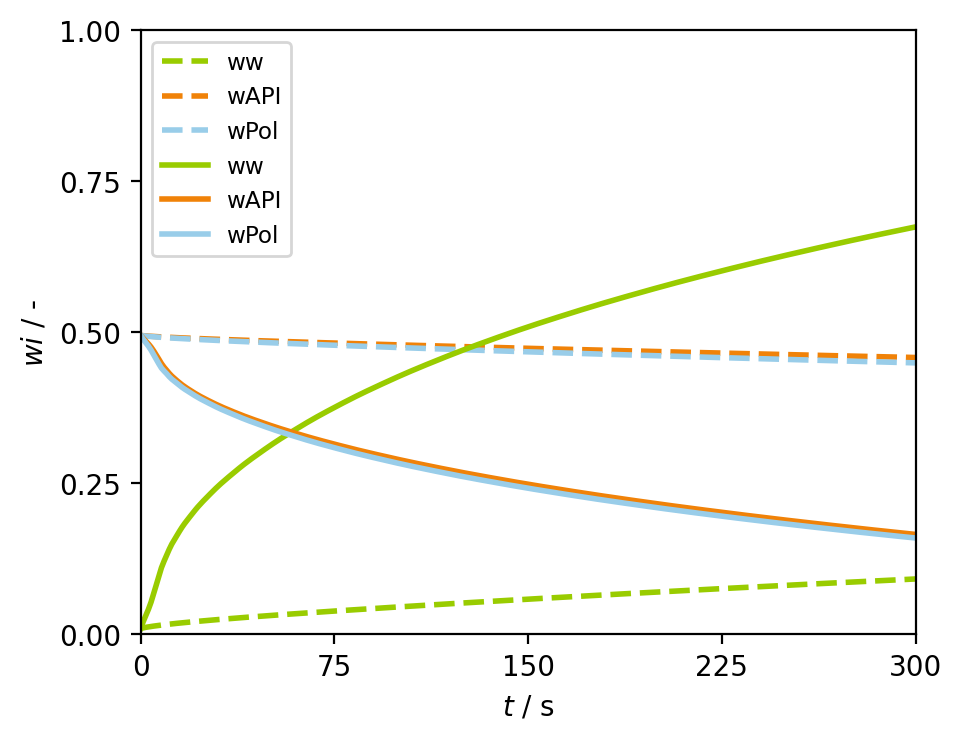

In [7]:

font = {'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

color1 = "#99CC00"
color2 = "#F08208"
color3 = "#99CDE9"

fig, ax = plt.subplots(figsize=(5, 4), dpi = 200)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax.plot(t/60,wtid[:,0], "--",color = color1 , 
        linewidth = 2.0, label = "ww")
ax.plot(t/60,wtid[:,1], "--",color = color2 , 
        linewidth = 2.0, label = "wAPI")
ax.plot(t/60,wtid[:,2], "--",color = color3 , 
        linewidth = 2.0, label = "wPol")

ax.plot(t/60,wt[:,0], "-",color = color1 , 
        linewidth = 2.0, label = "ww")
ax.plot(t/60,wt[:,1], "-",color = color2 , 
        linewidth = 2.0, label = "wAPI")
ax.plot(t/60,wt[:,2], "-",color = color3 , 
        linewidth = 2.0, label = "wPol")


ax.legend(fontsize="small")
ax.set_xlabel('$t$ / s')
ax.set_ylabel('$wi$ / -')
ax.axis([0, 300., 0., 1.])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))
plt.show()